# CA2 - Supervised machine learning classification pipeline - applied to medical data

### Important information

- Do __not__ use scikit-learn (`sklearn`) or any other high-level machine learning library for this CA
- Explain your code and reasoning in markdown cells or code comments
- Label all graphs and charts if applicable
- If you use code from the internet, make sure to reference it and explain it in your own words
- If you use additional function arguments, make sure to explain them in your own words
- Use the classes `Perceptron`, `Adaline` and `Logistic Regression` from the library `mlxtend` as classifiers (`from mlxtend.classifier import Perceptron, Adaline, LogisticRegression`). _Always_ use the argument `minibatches=1` when instantiating an `Adaline` or `LogisticRegression` object. This makes the model use the gradient descent algorithm for training. Always use the `random_seed=42` argument when instantiating the classifiers. This will make your results reproducible.
- You can use any plotting library you want (e.g. `matplotlib`, `seaborn`, `plotly`, etc.)
- Use explanatory variable names (e.g. `X_train` and `X_train_scaled` for the training data before and after scaling, respectively)
- The dataset is provided in the file `fetal_health.csv` in the `assets` folder

### Additional clues

- Use the `pandas` library for initial data inspection and preprocessing
- Before training the classifiers, convert the data to raw `numpy` arrays
- For Part IV, you are aiming to create a plot that looks similar to this:
<img src="./assets/example_output.png" width="300">

### Additional information

- Feel free to create additional code or markdown cells if you think it will help you explain your reasoning or structure your code (you don't have to).


## Part I: Data loading and data exploration

### Import necessary libraries/modules:

In [48]:
# Insert your code below
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mlxtend.classifier import Adaline, LogisticRegression, Perceptron
import seaborn as sns

#I import this to answer part II in part VI (split training/test-set with sklearn)
from sklearn.model_selection import train_test_split
# ======================

### Loading and exploring data

1. Load the dataset `fetal_health.csv` with `pandas`. Use the first column as the row index.
2. Check for missing data, report on your finding and remove samples with missing data, if you find any.
3. Display the raw data with appropriate plots/outputs and inspect it. Describe the distributions of the values of feature `"baseline value"`, `"accelerations"`, and the target variable `"fetal_health"`.
4. Will it be beneficial to scale the data? Why or why not?
5. Is the data linearly separable using a combination of any two pairs of features? Can we expect an accuracy close to 100% from a linear classifier?

In [68]:
#reading the csv file, setting column 0 as index column
df= pd.read_csv("assets/fetal_health.csv",index_col=0)


#sorting the dataset by the index numbers
df = df.sort_index()

#2 Check for missing values in the whole dataset
total_missing = df.isna().sum().sum() #having two sums for giving value of whole set, not each column
print("\nTotal missing values in the DataFrame:", total_missing)

#3
print("First 5 rows of dataset:")
df.head()
# ======================


Total missing values in the DataFrame: 0
First 5 rows of dataset:


baseline value  accelerations  prolongued_decelerations  \
0           120.0          0.000                     0.000   
5           134.0          0.001                     0.002   
6           134.0          0.001                     0.003   
7           122.0          0.000                     0.000   
8           122.0          0.000                     0.000   

   abnormal_short_term_variability  mean_value_of_short_term_variability  \
0                             73.0                                   0.5   
5                             26.0                                   5.9   
6                             29.0                                   6.3   
7                             83.0                                   0.5   
8                             84.0                                   0.5   

   percentage_of_time_with_abnormal_long_term_variability  histogram_mean  \
0                                               43.0                137.0   
5                                                0.0                107.0   
6                                                0.0                107.0   
7                                                6.0                122.0   
8                                                5.0                122.0   

   histogram_variance  fetal_health  
0                73.0             1  
5               170.0             1  
6               215.0             1  
7                 3.0             1  
8                 3.0             1

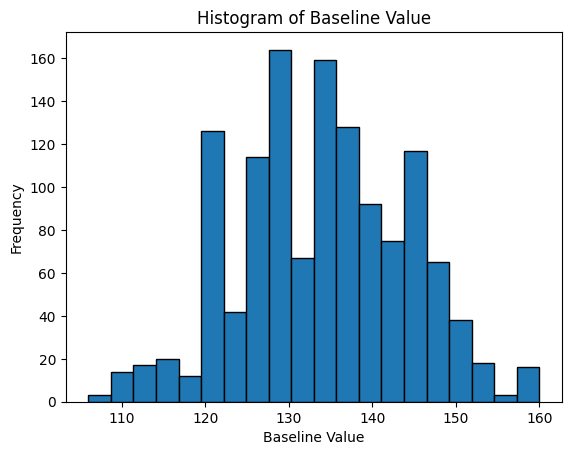

In [50]:
#Histogram plot of baseline value. Fixed with bins and edgcolor so it's easier to look at.
plt.hist(df['baseline value'], bins=20, edgecolor='black')
#Added a title 
plt.title('Histogram of Baseline Value')
#Added labels for axises
plt.xlabel('Baseline Value')
plt.ylabel('Frequency')
plt.show()

**The distorbution for baseline values** lays approximately between 110 and 160, where most lays between 120 and 150.

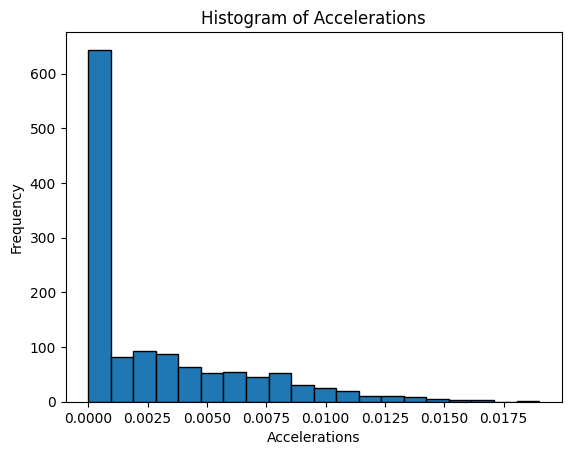

In [51]:
# Plot histogram for 'accelerations' with same methods as above
plt.hist(df['accelerations'], bins=20,edgecolor='black')
plt.title('Histogram of Accelerations')
plt.xlabel('Accelerations')
plt.ylabel('Frequency')
plt.show()

**The distorbution of Accelerations values** is mostly at zero. The number of frequencies get's lower as the acceleartion get's higher. 

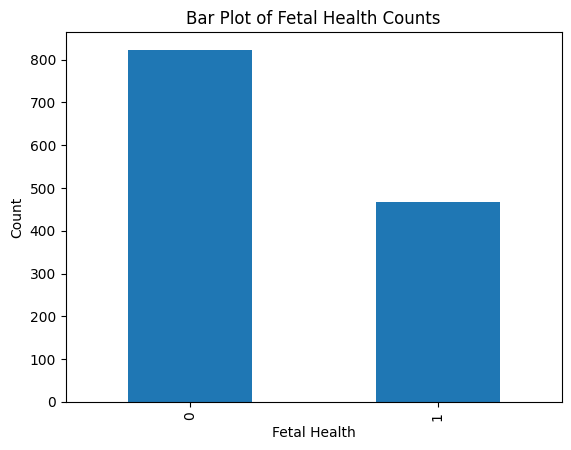

In [52]:
#Bar plot of 'fetal_health' counts
df['fetal_health'].value_counts().plot(kind='bar')
#Added a title for the plot
plt.title('Bar Plot of Fetal Health Counts')
#Added labels for the axises
plt.xlabel('Fetal Health')
plt.ylabel('Count')
plt.show()

**The values on fetal health** is either 0 or 1. Most is at 0.

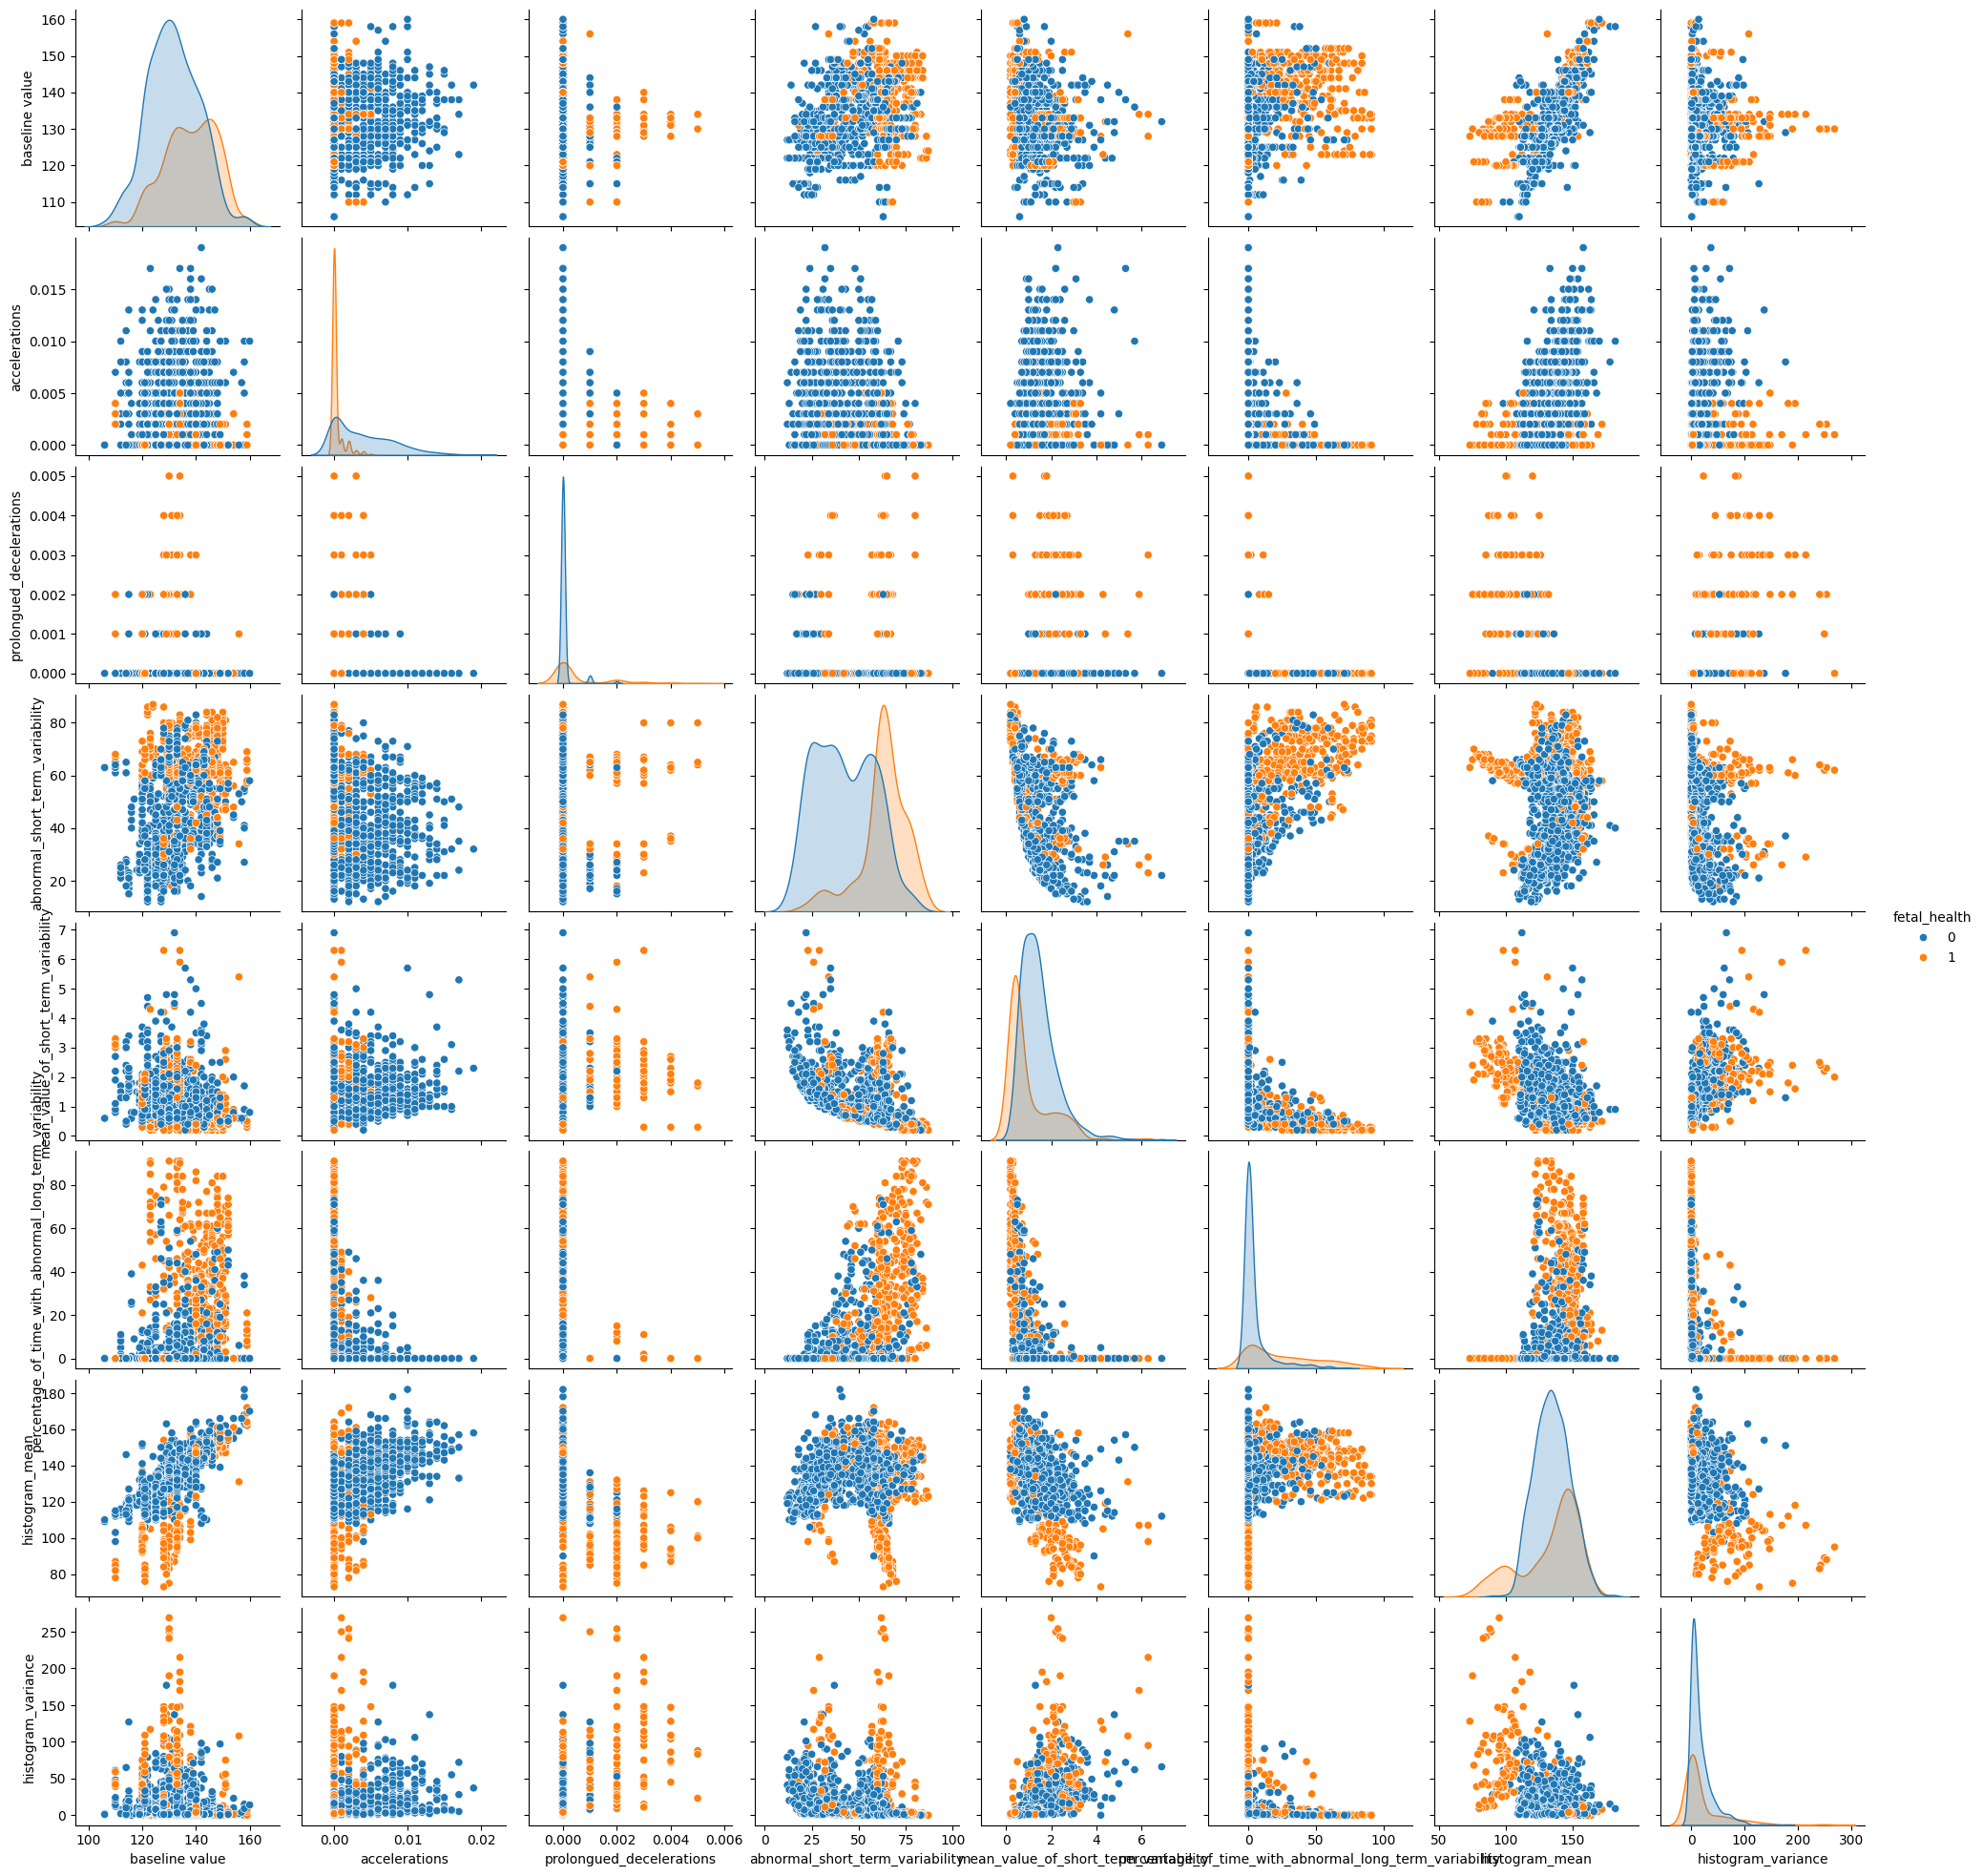

In [53]:

# Using seaborn to create plot of every combination of the columns in the dataset, with hue based on lethal_health
sns.pairplot(df, hue='fetal_health')
plt.show()

### **Answer to 4**
It can be beneficial to scale the data if we're going to use algoritmhs such as linear regression, adaline, perceptron or logistic regression on the data (which we're going to do). These algorithms use gradient descent for optimization, and may converge faster when the features are scaled.

### **Answer to 5**

By looking at the different plots, the data can be linear separable, using a combo of:

baselinevalue- histogram mean (or variance)

accelerations - prolongued_decelerations 

histogram mean- histogram variance

histogram variance - accelerations

mean_value_of_short_term_variability - prolongued_decelerations

it's unlikely to achieve close to 100% accuracy with a linear classifier. Most data consists of uncertainty or variability, which makes it hard to seperate classes with a perfect accuracy. The exampels i listed above would not be 100% accruate,but could help classify the target variable.



## Part II: Train/Test Split

Divide your dataset into training and testing subsets. Follow these steps to create the split:

1. **Divide the dataset into two data sets, each data set only contains samples of either class 0 or class 1:**
- Create a DataFrame `df_0` containing all data with `"fetal_health"` equal to 0.
- Create a DataFrame `df_1` containing all data with `"fetal_health"` equal to 1.

2. **Split into training and test set by randomly sampling entries from the data frames:**
- Create a DataFrame `df_0_train` containing by sampling `75%` of the entries from `df_0` (use the `sample` method of the data frame, fix the `random_state` to `42`).
- Create a DataFrame `df_1_train` using the same approach with `df_1`.
- Create a DataFrame `df_0_test` containing the remaining entries of `df_0` (use `df_0.drop(df_0_train.index)` to drop all entries except the previously extracted ones).
- Create a DataFrame `df_1_test` using the same approach with `df_1`.

3. **Merge the datasets split by classes back together:**
- Create a DataFrame `df_train` containing all entries from `df_0_train` and `df_1_train`. (Hint: use the `concat` method you know from CA1)
- Create a DataFrame `df_test` containing all entries from the two test sets.

4. **Create the following data frames from these splits:**
- `X_train`: Contains all columns of `df_train` except for the target feature `"fetal_health"`
- `X_test`: Contains all columns of `df_test` except for the target feature `"fetal_health"`
- `y_train`: Contains only the target feature `"fetal_health"` for all samples in the training set
- `y_test`: Contains only the target feature `"fetal_health"` for all samples in the test set

5. **Check that your sets have the expected sizes/shape by printing number of rows and colums ("shape") of the data sets.**
- (Sanity check: there should be 8 features, almost 1000 samples in the training set and slightly more than 300 samples in the test set.)


6. **Explain the purpose of this slightly complicated procedure. Why did we first split into the two classes? Why did we then split into a training and a testing set?**


7. **What is the share (in percent) of samples with class 0 label in test and training set, and in the intial data set?**



In [54]:
# Insert your code below
#dividing df into two datasets
df_0 = df[df['fetal_health'] == 0]
df_1 = df[df['fetal_health'] == 1]

# Set random_state to 42, for reproducibility
random_state = 42

# Sample 75% of the entries from df_0 and df_1
df_0_train = df_0.sample(frac=0.75, random_state=random_state)
df_1_train = df_1.sample(frac=0.75, random_state=random_state)

# creating test data frames from df_0 and df_1
df_0_test = df_0.drop(df_0_train.index)
df_1_test = df_1.drop(df_1_train.index)

# merge the datasets split by classes back together
df_train = pd.concat([df_0_train, df_1_train], ignore_index= True)
df_test = pd.concat([df_0_test, df_1_test], ignore_index= True)

# Features and target for training set
X_train = df_train.drop(columns=['fetal_health'])
y_train = df_train['fetal_health']

# Features and target for test set
X_test = df_test.drop(columns=['fetal_health'])
y_test = df_test['fetal_health']

#Check Dimensions of sets
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)
# ======================

Shape of X_train: (967, 8)
Shape of y_train: (967,)
Shape of X_test: (323, 8)
Shape of y_test: (323,)


### **Answer to 7**
By splitting the dataset into two class-datasets, splitting each class set by a training and test, and then merging the training- and test-sets back together, we ensure class-balance in the datasets. This makes the training and testing sets more representative of the overall dataset, and we can avoid biases that may affect the performance of the machine learning model.

By splitting the data into training and testing sets in the way we did, we can train the model on a portion of the data (X_train and y_train) and evaluate its perfomence on unseen data (X_test and y_test), for providing a more reliable estimate of the model's generalization ability.

In [55]:
# Calculate share of class 0 label in the initial data set
share_class_0_initial = (df['fetal_health'] == 0).mean() * 100

# Calculate share of class 0 label in the training set
share_class_0_train = (df_train['fetal_health'] == 0).mean() * 100

# Calculate share of class 0 label in the test set
share_class_0_test = (df_test['fetal_health'] == 0).mean() * 100

# Print the results. Formats so it prints the percentage with two decimal places
print("Share of class 0 label in the initial data set: {:.2f}%".format(share_class_0_initial))
print("Share of class 0 label in the training set: {:.2f}%".format(share_class_0_train))
print("Share of class 0 label in the test set: {:.2f}%".format(share_class_0_test))


Share of class 0 label in the initial data set: 63.80%
Share of class 0 label in the training set: 63.81%
Share of class 0 label in the test set: 63.78%


### Convert data to numpy arrays and shuffle the training data

Many machine learning models (including those you will work with later in the assignment) will not accept DataFrames as input. Instead, they will only work if you pass numpy arrays containing the data.
Here, we convert the DataFrames `X_train`, `X_test`, `y_train`, and `y_test` to numpy arrays `X_train`, `X_test`, `y_train`, and `y_test`.

Moreover we shuffle the training data. This is important because the training data is currently ordered by class. In Part IV, we use the first n samples from the training set to train the classifiers. If we did not shuffle the data, the classifiers would only be trained on samples of class 0.

Nothing to be done here, just execute the cell.

In [56]:
# convert to numpy arrays
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

# shuffle training data
np.random.seed(42) # for reproducibility
shuffle_index = np.random.permutation(len(X_train)) # generate random indices
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index] # shuffle data by applying reordering with the random indices

## Part III: Scaling the data

1. Standardize the training _and_ test data so that each feature has a mean of 0 and a standard deviation of 1.
2. Check that the scaling was successful
    - by printing the mean and standard deviation of each feature in the scaled training set
    - by putting the scaled training set into a DataFrame and make a violin plot of the data

__Hint:__ use the `axis` argument to calculate mean and standard deviation column-wise.

__Important:__ Avoid data leakage!

__More hints:__

1. For each column, subtract the mean $(\mu)$ of each column from each value in the column
2. Divide the result by the standard deviation $(\sigma)$ of the column

(You saw how to do both operations in the lecture. If you don't remember, you can look it up in Canvas files.)

Mathematically (in case this is useful for you), this transformation can be represented for each column as follows:

$$ X_\text{scaled} = \frac{(X - \mu)}{\sigma} $$

where:
- $(X_\text{scaled})$ are the new, transformed column values (a column-vector)
- $(X)$ is the original values
- $(\mu)$ is the mean of the column
- $(\sigma)$ is the standard deviation of the column



Mean of each feature in the scaled training set: [ 1.00540052e-15  4.78348832e-15 -4.84273084e-16 -6.88866406e-18
  1.45758391e-15  2.23881582e-16  4.46500242e-16 -3.56201338e-17]
Std of each feature in the scaled training set: [1. 1. 1. 1. 1. 1. 1. 1.]


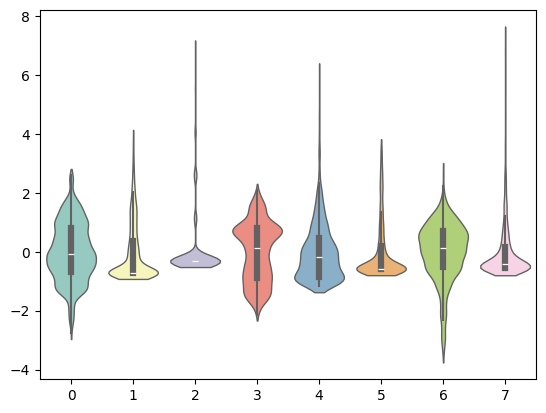

In [57]:
#Using the mean and std from the training set to avoid leakage
X_mean = np.mean(X_train, axis=0)
X_std = np.std(X_train, axis=0, ddof=1)

#Scaling the training set
X_train_sc = (X_train - X_mean) / X_std
#Finding mean and std for the scaled training set
X_train_sc_mean = np.mean(X_train_sc, axis=0)
X_train_sc_std = np.std(X_train_sc, axis=0, ddof=1)

#Scaling the testing set
X_test_sc = (X_test - X_mean) / X_std
# Finding mean and std for the scaled testing set 
X_test_sc_mean = np.mean(X_test_sc, axis=0)
X_test_sc_std = np.std(X_test_sc, axis=0, ddof=1)

#Printing the mean and std of each feature in the trainig set 
print("Mean of each feature in the scaled training set:", X_train_sc_mean)
print("Std of each feature in the scaled training set:", X_train_sc_std)

# Put data into pandas dataframe to access plotting functions
data_df_sc = pd.DataFrame(X_train_sc)


# Draw violin plot
sns.violinplot(data= X_train_sc, palette="Set3", bw_method=.2, cut=1, linewidth=1)
plt.show()


## Part IV: Training and evaluation with different dataset sizes and training times

Often, a larger dataset size will yield better model performance. (As we will learn later, this usually prevents overfitting and increases the generalization capability of the trained model.)
However, collecting data is usually rather expensive.

In this part of the exercise, you will investigate

- how the model performance changes with varying dataset size
- how the model performance changes with varying numbers of epochs/iterations of the optimizer/solver (increasing training time).

For this task (Part IV), use the `Adaline`, `Perceptron`, and `LogisticRegression` classifier from the `mlxtend` library. All use the gradient descent (GD) algorithm for training.

__Important__: Use a learning rate of `1e-4` (`0.0001`) for all classifiers, and use the argument `minibatches=1` when initializing `Adaline` and `LogisticRegression` classifier (this will make sure it uses GD). For all three classifiers, pass `random_seed=42` when initializing the classifier to ensure reproducibility of the results.

### Model training

Train the model models using progressively larger subsets of your dataset, specifically: first 50 rows, first 100 rows, first 150 rows, ..., first 650 rows, first 700 rows (in total $14$ different variants).

For each number of rows train the model with progressively larger number of epochs: 2, 7, 12, 17, ..., 87, 92, 97 (in total $20$ different model variants).

The resulting $14 \times 20 = 280$ models obtained from the different combinations of subsets and number of epochs. An output of the training process could look like this:

```
Model (1) Train a model with first 50 rows of data for 2 epochs
Model (2) Train a model with first 50 rows of data for 7 epochs
Model (3) Train a model with first 50 rows of data for 12 epochs
...
Model (21) Train a model with first 100 rows of data for 2 epochs
Model (22) Train a model with first 100 rows of data for 7 epochs
...
Model (279) Train a model with first 700 rows of data for 92 epochs
Model (280) Train a model with first 700 rows of data for 97 epochs
```

### Model evaluation

For each of the $280$ models, calculate the __accuracy on the test set__ (do __not__ use the score method but compute accuracy yourself).
Store the results in the provided 2D numpy array (it has $14$ rows and $20$ columns).
The rows of the array correspond to the different dataset sizes, and the columns correspond to the different numbers of epochs.

### Tasks
1. Train the $280$ Adaline classifiers as mentioned above and calculate the accuracy for each of the $280$ variants.
2. Generalize your code so that is doing the same procedure for all three classifiers: `Perceptron`, `Adaline`, and `LogisticRegression` after each other. Store the result for all classifiers. You can for example use an array of shape $3\times14\times20$ to store the accuracies of the three classifiers.

Note that executing the cells will take some time (but on most systems it should not be more than 5 minutes).

In [70]:
def train(X_train, X_test, y_train, y_test, classifier_list, dataset_sizes, epochs):
    # Initialize the accuracy results array
    accuracy_results = np.zeros((len(classifier_list), len(dataset_sizes), len(epochs)))

    # Iterate over each classifier type
    for k, classifier_type in enumerate(classifier_list):
        # Iterate over the dataset sizes
        for j, size in enumerate(dataset_sizes):
            # select subsets of data for the current size from dataset_sizes
            X_subset_train = X_train[:size]
            y_subset_train = y_train[:size]
            
            # Iterate over the epochs
            for l, epoch in enumerate(epochs):
                #Initializing the classifier we want to use
                model = classifier(classifier_type, epochs=epoch)
                #Fit the model with the current subsets 
                model.fit(X_subset_train, y_subset_train)

                #Predicts the model with x_test
                y_pred = model.predict(X_test)
                #calculate the accuracy
                accuracy = compute_accuracy(y_test, y_pred)

                # Store accuracy in the results array
                accuracy_results[k, j, l] = accuracy

    return accuracy_results

def classifier(classifier, eta=0.001, minibatches=1, random_seed=42, epochs=10):
    # Initialize a classifier based on the provided type.
    if classifier == "adaline":
        return Adaline(eta=eta, minibatches=minibatches, random_seed=random_seed, epochs=epochs)
    elif classifier == "logistic_regression":
        return LogisticRegression(eta=eta, minibatches=minibatches, random_seed=random_seed, epochs=epochs)
    elif classifier == "perceptron":
        return Perceptron(eta=eta, random_seed=random_seed, epochs=epochs)

# Computes the accuracy of predictions
def compute_accuracy(y_true, y_pred):
    # sums corect predictions
    correct = np.sum(y_true == y_pred)
    #finds total predictions
    total = len(y_true)
    #divides correct predictions by the total predictions
    accuracy = correct / total
    return accuracy

# Making lists of varying classifiers, dataset sizes and epochs
classifier_list = ["adaline", "logistic_regression", "perceptron"]
dataset_sizes = [50*(j+1) for j in range(14)]  # Dataset sizes: 50 to 700, increments of 50
epochs = [5*(j+1)-3 for j in range(20)]  # Epochs: 2 to 97, customized pattern

accuracy_results = train(X_train_sc, X_test_sc, y_train, y_test, classifier_list=classifier_list, dataset_sizes= dataset_sizes, epochs= epochs)


In [71]:
#For printing out the different results from the training
#Iterates over the different classifiers from the list
for k, classifier_type in enumerate(classifier_list):
    # Iterate over each dataset size
    for i, size in enumerate(dataset_sizes):
        # Iterate over each epoch value
        for j, epoch in enumerate(epochs):
            # Print the model details including classifier type, dataset size, epoch count, and accuracy
            # The accuracy is retrieved from the pre-calculated accuracy_results array
            # and formatted as a percentage with two decimal places
            print(f"Model ({i*20 + j + 1}) Train a {classifier_type} model with first {size} rows of data for {epoch} epochs: Accuracy = {accuracy_results[k, i, j]:.2f}%")


Model (1) Train a adaline model with first 50 rows of data for 2 epochs: Accuracy = 0.85%
Model (2) Train a adaline model with first 50 rows of data for 7 epochs: Accuracy = 0.86%
Model (3) Train a adaline model with first 50 rows of data for 12 epochs: Accuracy = 0.86%
Model (4) Train a adaline model with first 50 rows of data for 17 epochs: Accuracy = 0.87%
Model (5) Train a adaline model with first 50 rows of data for 22 epochs: Accuracy = 0.86%
Model (6) Train a adaline model with first 50 rows of data for 27 epochs: Accuracy = 0.87%
Model (7) Train a adaline model with first 50 rows of data for 32 epochs: Accuracy = 0.87%
Model (8) Train a adaline model with first 50 rows of data for 37 epochs: Accuracy = 0.87%
Model (9) Train a adaline model with first 50 rows of data for 42 epochs: Accuracy = 0.87%
Model (10) Train a adaline model with first 50 rows of data for 47 epochs: Accuracy = 0.87%
Model (11) Train a adaline model with first 50 rows of data for 52 epochs: Accuracy = 0.88%

### Performance visualization

Plot the performance measure for all classifiers (accuracy on the test set; use the result array from above) of all the $280$ variants for each classifier in a total of three heatmaps using, for example `seaborn` or `matplotlib` directly.

The color should represent the accuracy on the test set, and the x and y axes should represent the number of epochs and the dataset size, respectively.
Which one is x and which one is y is up to you to decide. Look in the example output at the top of the assignment for inspiration for how the plot could look like and how it could be labeled nicely. (But use the correct numbers corresponding to your dataset sizes and number of epochs.)

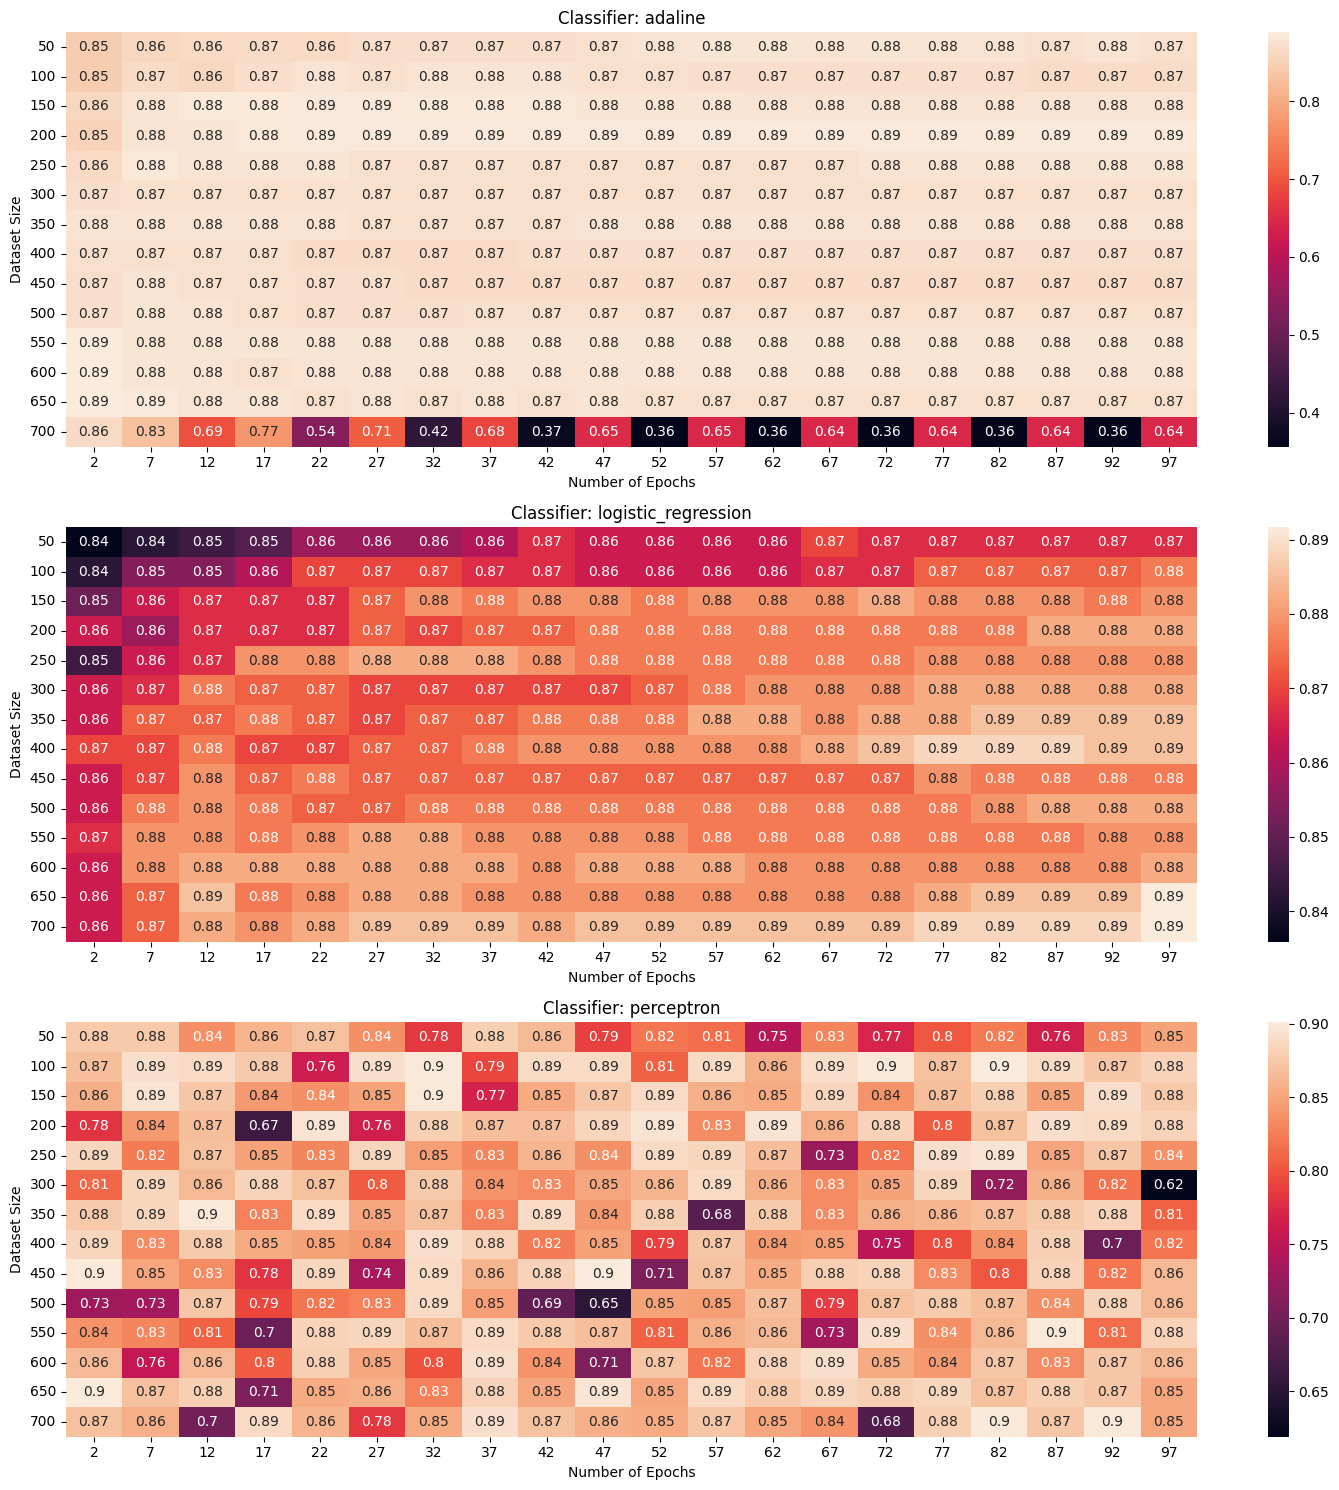

In [80]:
# Create a figure for three heatmaps 
fig, axs = plt.subplots(3, 1, figsize=(15, 15))


#Iterates over each classifier from the array
for k, classifier in enumerate(classifier_list):
    #plots the data from each classifier into its own heatmap
    #accuracy_results[k, :, :] is the data being plotted in the heatmap.
    # ax=axs[k]: This specifies the axes object where the heatmap will be drawn. axs[k] is the specific subplot
    # annot=True enables the annotation of each cell in the heatmap with its value
    # xticklabels=epochs and yticklabels=dataset_sizes specify the labels to be used on the x-axis and y-axis of the heatmap
    sns.heatmap(accuracy_results[k, :, :], ax=axs[k], annot=True, xticklabels=epochs, yticklabels=dataset_sizes)
    # sets title, x-label and y-label for each subplot
    axs[k].set_title(f'Classifier: {classifier}')
    axs[k].set_xlabel('Number of Epochs')
    axs[k].set_ylabel('Dataset Size')

# Adjust the layout to make sure there's no overlap of subplots
plt.tight_layout()

plt.show()

# Part V: Some more plotting

For the following cell to execute you need to have the variable `X_test_scaled` with all samples of the test set and the variable `y_test` with the corresponding labels.
Complete at least up until Part III. Executing the cell will plot something.

1. Add code comments explaining what the lines are doing
2. What is the purpose of the plot?
3. Describe all components of the subplot and then comment in general on the entire plot. What does it show? What does it not show?

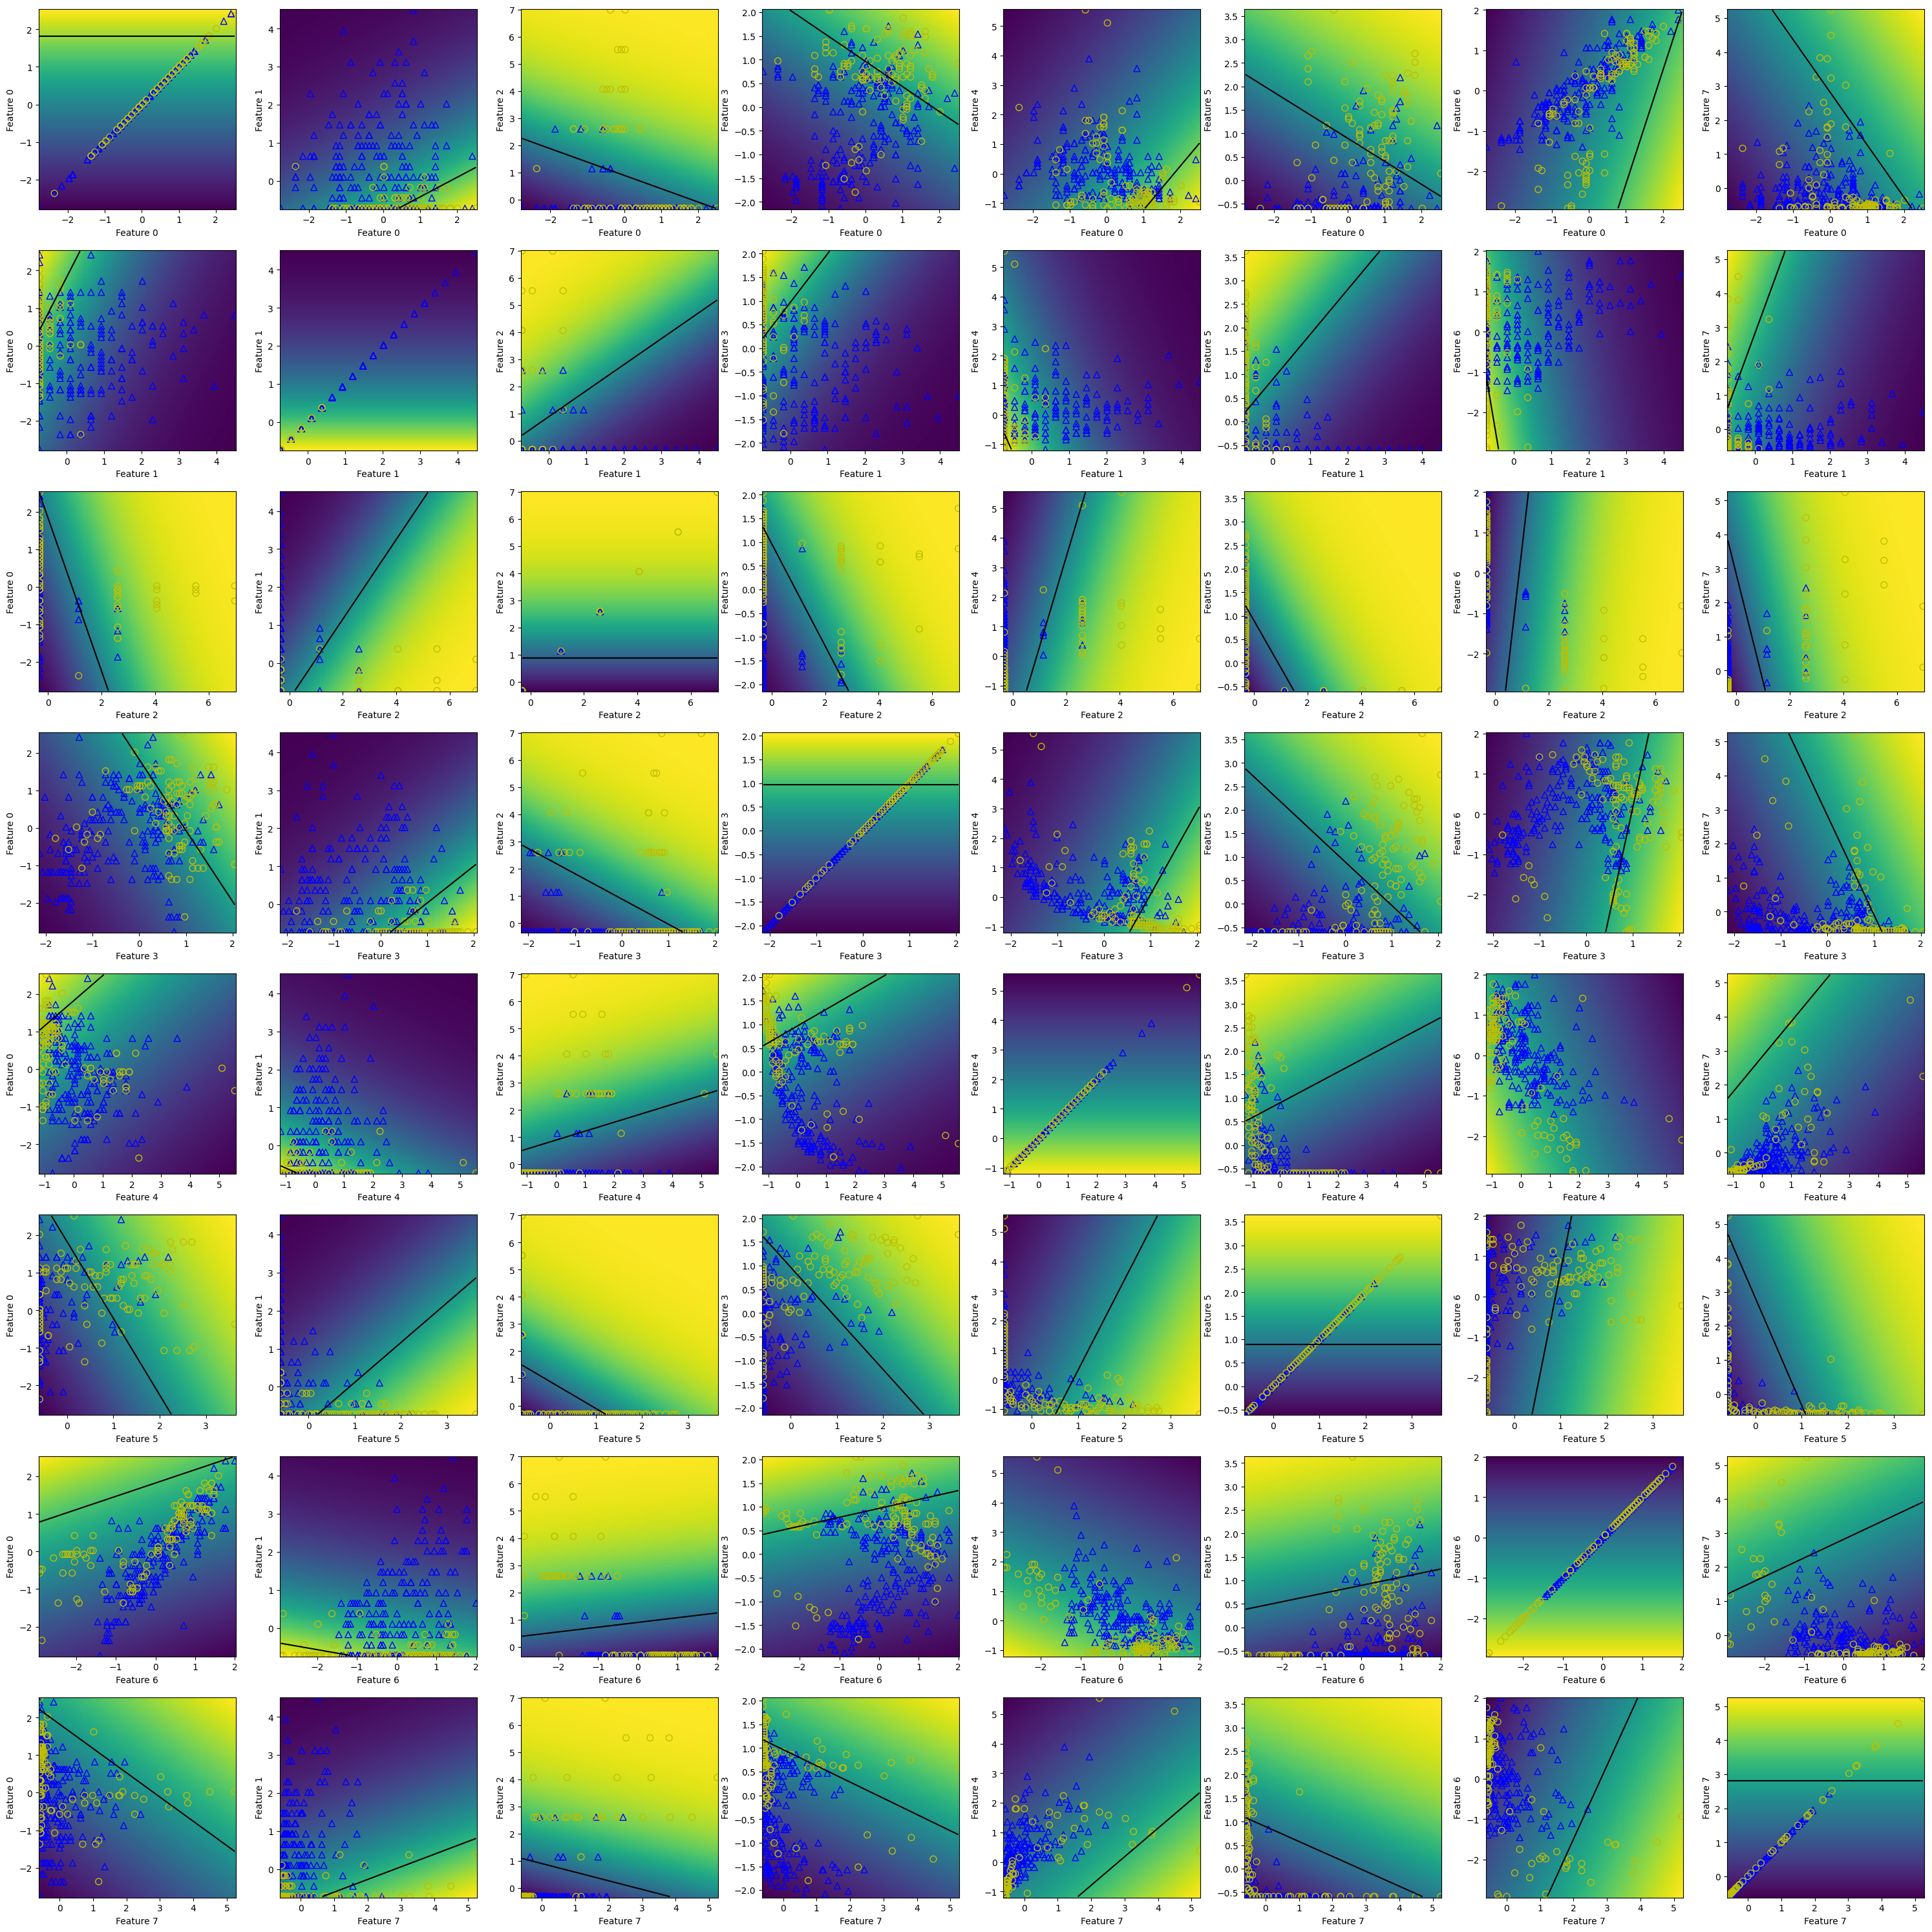

In [78]:
# Train a logistic regression model with 300 epochs and learning rate 0.0001
clf = LogisticRegression(eta = 0.0001, epochs = 300, minibatches=1, random_seed=42)
# Fit the model on the scaled test data
clf.fit(X_test_sc, y_test)

#Create 8x8 subplots with specified size
fig, axes = plt.subplots(8, 8, figsize=(30, 30))

#Iterate over each subplot in the matrix
for i in range(0, 8):
    for j in range(0, 8):
        #define which features to use for each plot
        feature_1 = i
        feature_2 = j
        ax = axes[i, j]

        #set labels for the axises
        ax.set_xlabel(f"Feature {feature_1}")
        ax.set_ylabel(f"Feature {feature_2}")

        # find the mins and maxes for the features in the scaled test set
        mins = X_test_sc.min(axis=0)
        maxs = X_test_sc.max(axis=0)

        # Generate 100 linearly spaced points between the min and max values of each feature
        x0 = np.linspace(mins[feature_1], maxs[feature_1], 100)
        x1 = np.linspace(mins[feature_2], maxs[feature_2], 100)

        # Create a meshgrid from the linearly spaced points
        X0, X1 = np.meshgrid(x0, x1)
        # Combine the meshgrid points into a matrix of two-feature data points
        X_two_features = np.c_[X0.ravel(), X1.ravel()]
         # Initialize a matrix to hold the full set of features for prediction
        X_plot = np.zeros(shape=(X_two_features.shape[0], X_test_sc.shape[1]))


        # Update the matrix with the two features of interest
        X_plot[:, feature_1] = X_two_features[:, 0]
        X_plot[:, feature_2] = X_two_features[:, 1]

        # Predict the probability of class 1 for the two-feature data points
        y_pred = clf.predict_proba(X_plot)
        # Reshape the predictions to fit the meshgrid shape
        Z = y_pred.reshape(X0.shape)

        # Plot the probability density using a pseudocolor plot
        ax.pcolor(X0, X1, Z)
        # Draw contour lines at the 0.5 probability level to show the decision boundary
        ax.contour(X0, X1, Z, levels=[0.5], colors='k')
        # Scatter plot of class 0 points
        ax.scatter(X_test_sc[y_test == 0, feature_1], X_test_sc[y_test == 0, feature_2], color="b", marker="^", s=50, facecolors="none")
        # Scatter plot of class 1 points
        ax.scatter(X_test_sc[y_test == 1, feature_1], X_test_sc[y_test == 1, feature_2], color="y", marker="o", s=50, facecolors="none")

# Adjust the layout to make sure there's no overlap of subplots
fig.tight_layout()
plt.show()

### **Answer to 2**

The purpose of the plot is to visually examine how a logistic regression model distinguishes between two classes based on different pairs of features in the dataset.

The visualization of decision boundaries can help us understanding how the model perceives the separation between classes based on each unique pair of features.

By plotting the decision boundaries and data points for different combinations of features, we can see which features and combinations of features that are more discriminative for the classification task, and which features that result in well-defined, clear boundaries.

These plots also provide deep insights into the data itself, highlighting the relationships between different features and how these relationships contribute to the classification task.

## Components of each subplot:

- **Decision Boundary:** Illustrated by a line, where the model predicts a 50% probability of belonging to class 1.

- **Probability Density:** Shown through a pseudocolor plot, indicating the model's predicted probability of class 1 across the feature space.


- **Scatter Points:** Data points from the test set are plotted, with different markers and colors indicating the actual class of each point. These points allow us to see where actual data points fall relative to the predicted decision boundary.

- **Axis Labels:** Indicate the specific features being plotted on the x and y axes, helping to identify which feature combinations are being visualized.


The whole plot shows how well different combinations of features are able to separate the two classes. By comparing subplots, one can observe variations in the model's decision boundaries across different feature pairs, which can give more insights into the model's consistency and reliability in classyfig new data points based on different sets of features. The plot can reveal non-linear relationships between pairs of features that the model utilizes for making predictions.

The plot does not show direct metrics of model performance, for example accuracy. Interactions beyond pairs of features are not represented. The logistic regression's decision boundary visualizations are limited to two dimensions at each time in the plots. It doens't show how to decision boundary might change with different subsets of the data, beyond the test set used here.

## Part VI: Additional discussion

### Part I:
1. What kind of plots did you use to visualize the raw data, and why did you choose these types of plots?

### Part II:
1. What happens if we don't shuffle the training data before training the classifiers like in Part IV?
2. How could you do the same train/test split (Point 1.-4.) using scikit-learn?

### Part IV:
1. How does increasing the dataset size affect the performance of the logistic regression model? Provide a summary of your findings.
2. Describe the relationship between the number of epochs and model accuracy
3. Which classifier is much slower to train and why do you think that is?
4. One classifier shows strong fluctuations in accuracy for different dataset sizes and number of epochs. Which one is it and why do you think this happens?

### Answer to Part 1
I used histogram plots for the features "baseline value" and "accelerations. I used these plots to visualize the distributions of these values. I'm sure that other types of plots would also work. Histograms are excellent for visualizing the distribution of continuous or numerical data, and helped me to see the shape of the data distribution.

I used a bar plot for the counts of the feature "fetal_health". I used this plot to see the distribution of this value and that the value was either 0 or 1. "fetal_health" is a categorical variable, and bar plots are ideal for comparing the frequency or count of categories within a categorical variable.

I made scatter plots where each plot was a combination of the features in the dataset, with hue as "fetal_health". I made these plots to see if the data could be linearly seperable with a combination of the features in the dataset. Scatter plots are highly effective for examining the relationship between two continuous variables.

### Answer to Part 2
**1.** Not shuffling the training data can lead to biased models that do not perform well on unseen data, due to overfitting, poor generalization, and skewed learning from imbalanced or sequentially ordered datasets. Shuffling the data is important for preparing data for training models.

**2.**
Here's how we could do the same train/test split with scikit-learn:

In [ ]:
# Assuming `df` is your DataFrame and 'fetal_health' is the column you want to predict

# Features and target variable
X = df.drop(columns=['fetal_health'])
y = df['fetal_health']


# Splitting the dataset into training and test sets while stratifying to maintain class balance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

### Answer to Part IV
**1.** 
- The performance of the logistic regression model get's better by icreasing the dataset size. The accuracy goes from 0.84- 0.87 to 0.86-0.89.
- While the accuracy improves with larger datasets, the rate of improvement in accuracy seems to decrease as the dataset size increases. 
- the logistic regression model achieves relatively high accuracy at dataset sizes of 300 and above. The accuracy seems to plateau around these sizes.

**2.**
At small dataset sizes (50 to 200), increasing the number of epochs leads to a better accuracy.

At bigger dataset sizes, the improvment in accuracy tends to plateu after a certain number of epochs.

For all datasetsizes, the accuracy is lower when there are only 2 epochs.

**3**
From the heatmaps, it looks like logistic regression needs more epochs for improving accuracy, so this is the slowest classifier. It also performs better on bigger datasets.

The logstic regression classifier may me slower because it requres more complex optimization algorithms like gradient descent or quasi-Newton methods because it aims to maximize the likelihood function. The convergence of these optimization algorithms can be slower because they need to evaluate the gradient of the loss function at each step, and the loss surface can be more complex than in the case of ADALINE or perceptron.

**4**
The perecptron classifier shows strong fluctuations in accuracy for different dataset sizes and number of epochs.
A reason can be that the data is to complex for the perceptron, which is to simple for the data. For example, if the dataset contain features that are non-linear, the Perceptron will continue to update its weights with each epoch, leading to oscillations in the decision boundary,

Variability in the dataset, such as noise or outliers, can lead to fluctuations in Perceptron performance. Since the Perceptron learns from mistakes, outliers can influence the learning process negative.